No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


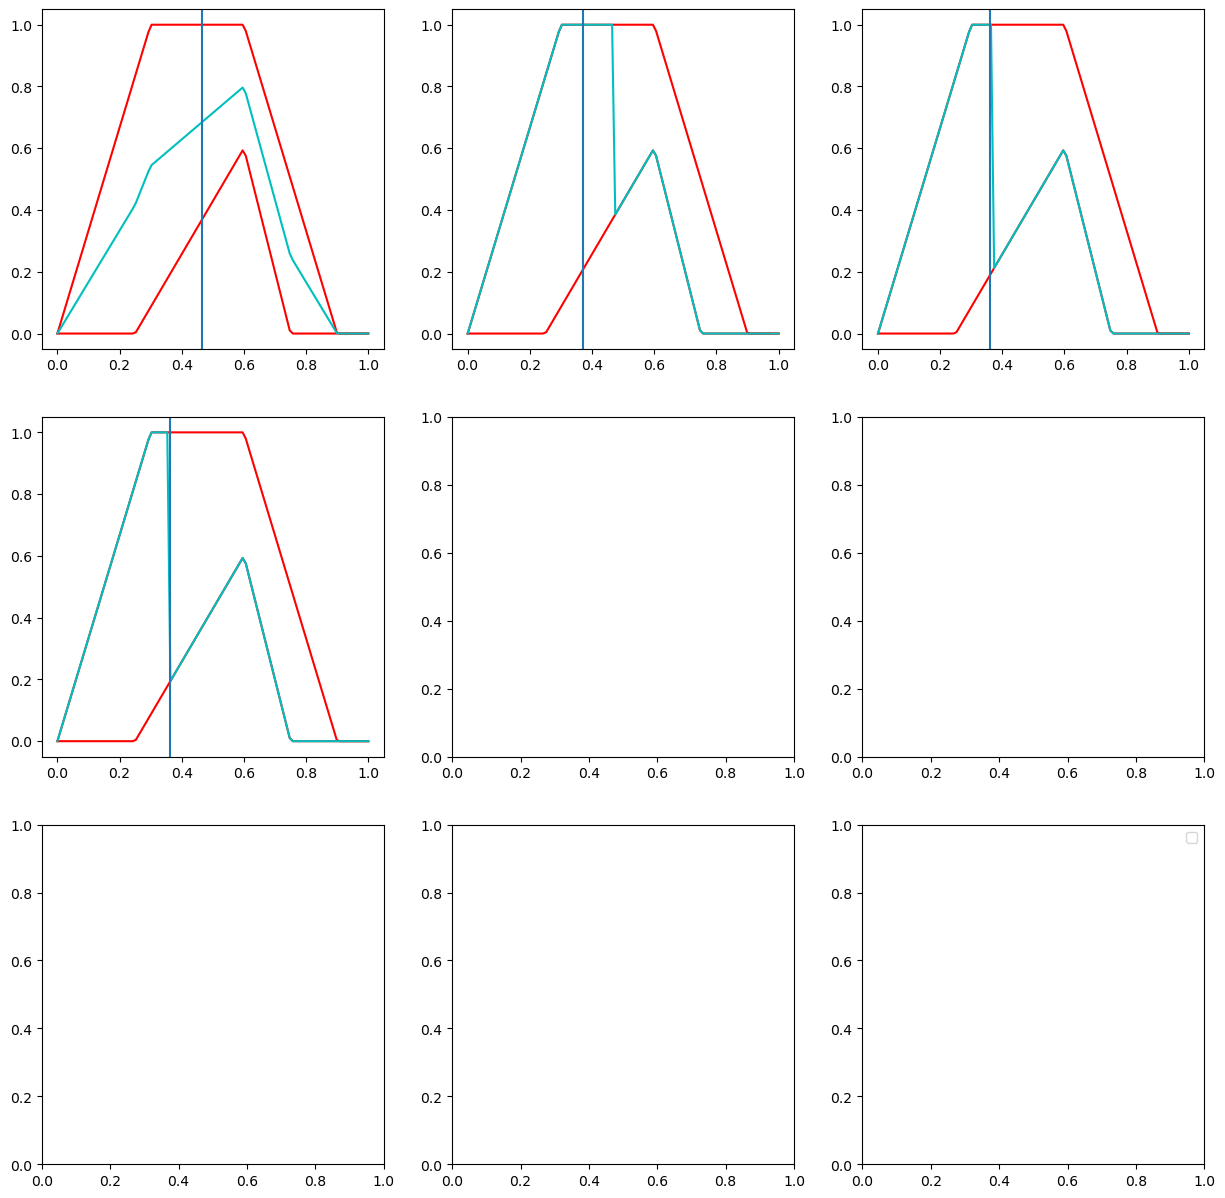

In [62]:
from pyit2fls import trapezoid_mf,tri_mf,IT2FS
from numpy import linspace
import matplotlib.pyplot as plt

domain=linspace(0.,1.,100)

def draw_plot(r,c,u,l,ae,ca):
    axs[r,c].plot(domain,u,color='red',label='umf')
    axs[r,c].plot(domain,l,color='red',label='lmf')
    axs[r,c].plot(domain,ae,'c-',label='mid embedded')
    axs[r,c].axvline(x=ca, label='centroid')

def calc_centroid(fs):
    s=0
    m=0
    for x in range(domain.size):
        s += domain[x]*fs[x]
        m += fs[x]
    c=s/m
    return c

umf=trapezoid_mf(domain,[0,0.3,0.6,0.9,1])
lmf=tri_mf(domain,[0.25,0.6,0.75,0.6])

# calculate A~e
ate=[0 for x in range(domain.size)]
for x in range(domain.size):
    ate[x]=(umf[x]+lmf[x])/2
#calculate centroid A~e
centroid_ate=calc_centroid(ate)
#print(centroid_ate)

fig ,axs=plt.subplots(3,3,figsize=(15,15))
col=0
row=0
draw_plot(row,col,umf,lmf,ate,centroid_ate)

# new A~e
for x in range(domain.size):
    if domain[x]<= centroid_ate:
        ate[x]=umf[x]
    else:
        ate[x]=lmf[x]
# new centroid A~e
centroid_ate=calc_centroid(ate)

col+=1
draw_plot(row,col,umf,lmf,ate,centroid_ate)

for x in range(domain.size):
    if domain[x]<= centroid_ate:
        ate[x]=umf[x]
    else:
        ate[x]=lmf[x]
# new centroid A~e
centroid_ate=calc_centroid(ate)

col+=1
draw_plot(row,col,umf,lmf,ate,centroid_ate)

for x in range(domain.size):
    if domain[x]<= centroid_ate:
        ate[x]=umf[x]
    else:
        ate[x]=lmf[x]
# new centroid A~e
centroid_ate=calc_centroid(ate)
col=0
row+=1
draw_plot(row,col,umf,lmf,ate,centroid_ate)




plt.legend()
plt.show()
